# 决策树实现用户购买预测
22210980051 李韵

In [40]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

## 1. 数据处理

In [14]:
dataset = [
    [1, '<=30', 'high', 'no', 'fair', 'no'],
    [2, '<=30', 'high', 'no', 'excellent', 'no'],
    [3, '[31,40]', 'high', 'no', 'fair', 'yes'],
    [4, '>40', 'medium', 'no', 'fair', 'yes'],
    [5, '>40', 'low', 'yes', 'fair', 'yes'],
    [6, '>40', 'low', 'yes', 'excellent', 'no'],
    [7, '[31,40]', 'low', 'yes', 'excellent', 'yes'],
    [8, '<=30', 'medium', 'no', 'fair', 'no'],
    [9, '<=30', 'low', 'yes', 'fair', 'yes'],
    [10, '>40', 'medium', 'yes', 'fair', 'yes'],
    [11, '<=30', 'medium', 'yes', 'excellent', 'yes'],
    [12, '[31,40]', 'medium', 'no', 'excellent', 'yes'],
    [13, '[31,40]', 'high', 'yes', 'fair', 'yes'],
]
columns = ['User id', 'Age', 'Incoming', 'Student', 'Credit Rating', 'Buying']
df = pd.DataFrame(dataset, columns=columns)
df

,User id,Age,Incoming,Student,Credit Rating,Buying
0,1,<=30,high,no,fair,no
1,2,<=30,high,no,excellent,no
2,3,"[31,40]",high,no,fair,yes
3,4,>40,medium,no,fair,yes
4,5,>40,low,yes,fair,yes
5,6,>40,low,yes,excellent,no
6,7,"[31,40]",low,yes,excellent,yes
7,8,<=30,medium,no,fair,no
8,9,<=30,low,yes,fair,yes
9,10,>40,medium,yes,fair,yes


In [15]:
labels = df.iloc[:,-1]
labels

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
Name: Buying, dtype: object

In [16]:
features = df.iloc[:,1:-1]
features = features.to_dict('records')
features

[{'Age': '<=30', 'Incoming': 'high', 'Student': 'no', 'Credit Rating': 'fair'},
 {'Age': '<=30',
  'Incoming': 'high',
  'Student': 'no',
  'Credit Rating': 'excellent'},
 {'Age': '[31,40]',
  'Incoming': 'high',
  'Student': 'no',
  'Credit Rating': 'fair'},
 {'Age': '>40',
  'Incoming': 'medium',
  'Student': 'no',
  'Credit Rating': 'fair'},
 {'Age': '>40', 'Incoming': 'low', 'Student': 'yes', 'Credit Rating': 'fair'},
 {'Age': '>40',
  'Incoming': 'low',
  'Student': 'yes',
  'Credit Rating': 'excellent'},
 {'Age': '[31,40]',
  'Incoming': 'low',
  'Student': 'yes',
  'Credit Rating': 'excellent'},
 {'Age': '<=30',
  'Incoming': 'medium',
  'Student': 'no',
  'Credit Rating': 'fair'},
 {'Age': '<=30', 'Incoming': 'low', 'Student': 'yes', 'Credit Rating': 'fair'},
 {'Age': '>40',
  'Incoming': 'medium',
  'Student': 'yes',
  'Credit Rating': 'fair'},
 {'Age': '<=30',
  'Incoming': 'medium',
  'Student': 'yes',
  'Credit Rating': 'excellent'},
 {'Age': '[31,40]',
  'Incoming': 'mediu

In [18]:
vec = DictVectorizer()
X = vec.fit_transform(features).toarray()
print(X)
print(vec.get_feature_names())

[[1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]]
['Age=<=30', 'Age=>40', 'Age=[31,40]', 'Credit Rating=excellent', 'Credit Rating=fair', 'Incoming=high', 'Incoming=low', 'Incoming=medium', 'Student=no', 'Student=yes']


In [20]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(labels)
print(y)

[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


LabelBinarizer()

## 2. 模型训练与可视化

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,y)

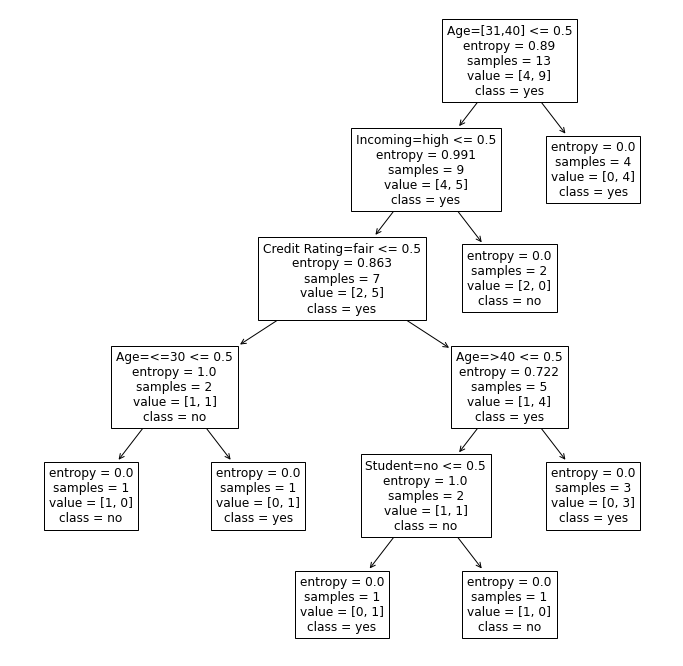

In [47]:
feature_names = vec.get_feature_names()
class_names = df['Buying'].unique().tolist()

plt.figure(figsize=(12,12))
tree.plot_tree(clf,
    feature_names=feature_names,
    class_names=class_names)
plt.savefig('DT_vis.png', dpi=100)
plt.show()